# FlameStream workers scalability comparision

In [23]:
require(data.table)

In [27]:
prep <- function(path) {
    return (tail(scan(path, sep = ","), -200) / 1e6)
}

In [28]:
fl <- prep("fl.data")
fs.old <- prep("old-redo/fs-10w-2.data")
fs.old.copy <- prep("old-redo/fs-copy.data")
fs.single.thread <- prep("fs-single-thread.data")
fs.rmhop <- prep("fs-rmhop.data")
fs.buffer.acks <- prep("fs-buffer-acks.data")

In [29]:
summary(fl)
summary(fs.old)
summary(fs.old.copy)
summary(fs.single.thread)
summary(fs.rmhop)
summary(fs.buffer.acks)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.271  15.642  28.446  40.829  51.532 375.657 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.607  42.178  54.061  64.695  70.364 521.916 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.24   40.36   51.00   65.84   72.66  571.56 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.308  22.837  58.260 100.054 128.728 876.513 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.458  17.466  41.058  61.919  83.195 488.470 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.091  18.790  45.082  69.026  94.682 533.605 

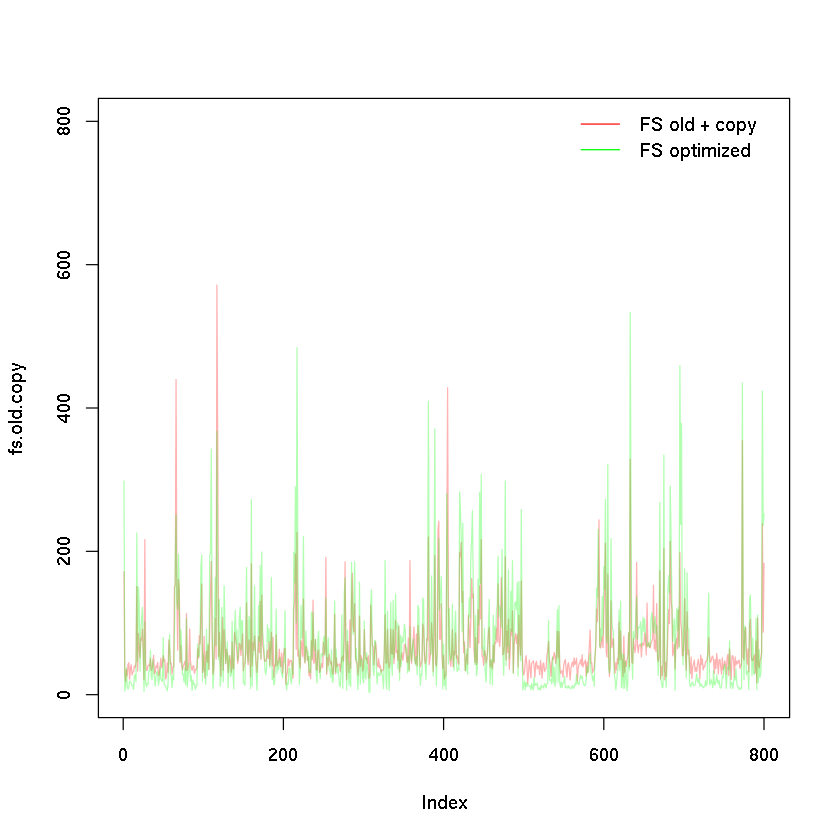

In [30]:
plot(fs.old.copy, t="l", ylim=c(0, 800), col=rgb(1,0,0,0.3))
lines(fs.buffer.acks, t="l", ylim=c(0, 800), col=rgb(0,1,0,0.3))
legend(
    "topright", 
    legend = c("FS old + copy", "FS optimized"), 
    col = c("red", "green"),
    lty = c(1, 1),
    bty = "n",
    text.col = "black"
)

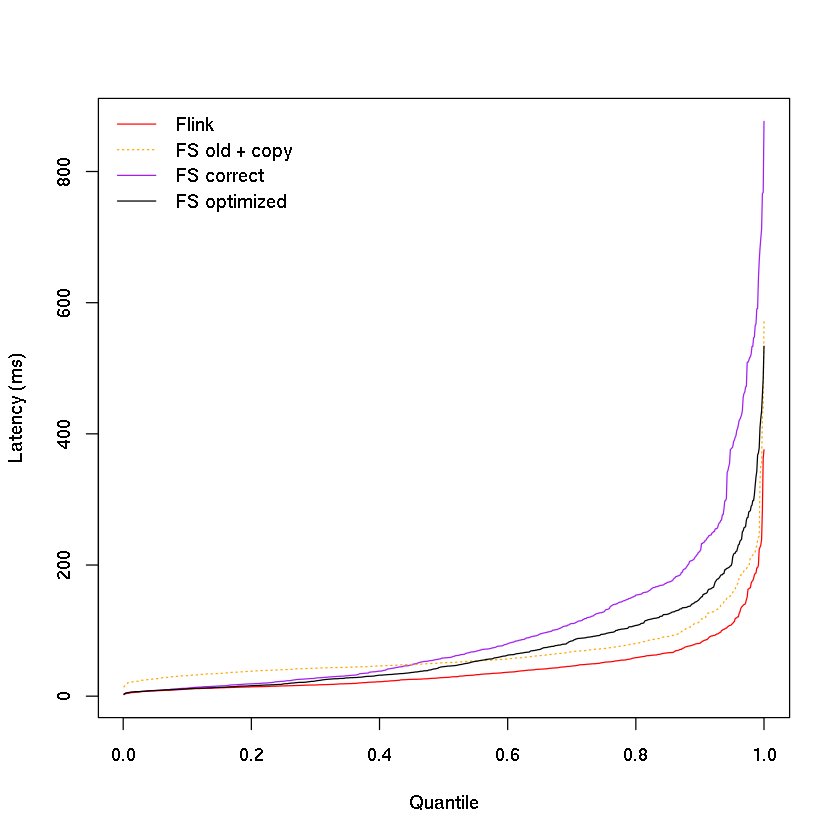

In [5]:
quntiles.1000 <- seq(1, length(fl)) / length(fl)
plot(quntiles.1000, sort(fs.single.thread), type = "l", col = "purple",  xlab = "Quantile", ylab = "Latency (ms)")
lines(quntiles.1000, sort(fs.old.copy), col = "orange", lty=3)
lines(quntiles.1000, sort(fl), col = "red")
lines(quntiles.1000, sort(fs.buffer.acks), col = "black")
legend(
    "topleft", 
    legend = c("Flink", "FS old + copy", "FS correct", "FS optimized"), 
    col = c("red", "orange", "purple", "black"),
    lty = c(1, 3, 1, 1),
    bty = "n",
    text.col = "black"
)

In [11]:
bars <- function(a, b, col.names = c("FlameStream", "Flink")) {
    m <- matrix(c(quantile(a, p = 0.5),
        quantile(a, p = 0.95) - quantile(a, p = 0.5),
        quantile(a, p = 0.99) - quantile(a, p = 0.95),
        quantile(b, p = 0.5),
        quantile(b, p = 0.95) - quantile(b, p = 0.5),
        quantile(b, p = 0.99) - quantile(b, p = 0.95)), nrow=3)
    colnames(m) <- col.names
    rownames(m) <- c("50%", "95%", "99%")
    barplot(m, horiz = T, col = c("grey20", "grey50", "grey80"), xlab = "Latency (ms)")
    legend("bottomright",
           title = "Quantiles",
           legend = c("50%", "95%", "99%"), 
           fill = c("grey20", "grey50", "grey80"))
}

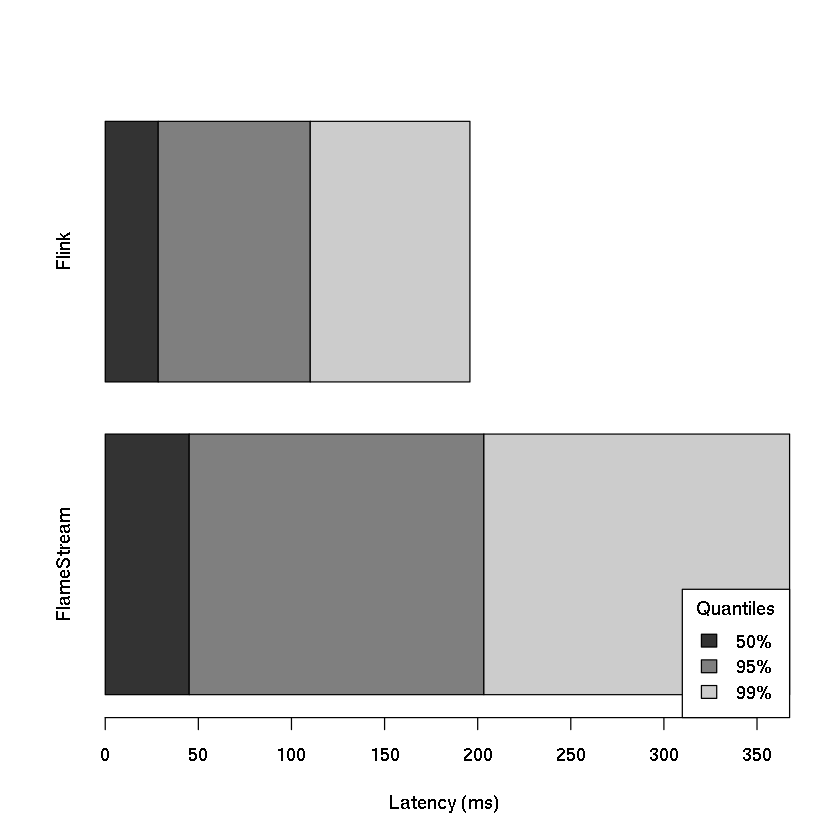

In [12]:
bars(fs.buffer.acks, fl)

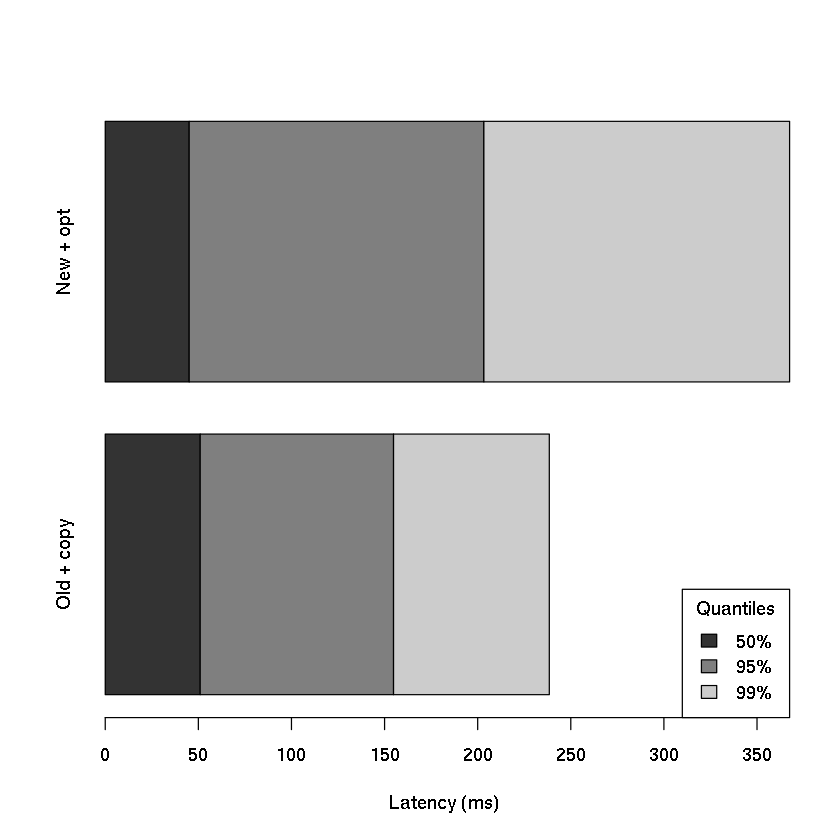

In [13]:
bars(fs.old.copy, fs.buffer.acks, c("Old + copy", "New + opt"))